<h1> 🌸 Klasifikasi Iris — Perceptron & Adaline (GD & SGD) </h1>

<p><strong> Notebook latihan ini membangun dan memvisualisasikan model Perceptron serta Adaline (Gradient Descent & Stochastic Gradient Descent) pada subset Iris (Setosa vs Versicolor; 2 fitur).</strong></p>

<ol><strong>
  <li>Persiapan & impor pustaka</li>
  <li>Memuat data (CSV dari UCI) & cek isi</li>
  <li>Pra-proses & visualisasi data</li>
  <li>Model 1: Perceptron + grafik error + decision boundary</li>
  <li>Model 2: AdalineGD (Batch GD) + efek learning rate + standardisasi + grafik loss</li>
  <li>Model 3: AdalineSGD (SGD) + decision boundary + grafik loss + partial fit</li>
  <li>Prediksi data baru (Perceptron vs AdalineGD vs AdalineSGD)</li>
    </strong>
</ol>

<p><strong>Catatan: Kita hanya pakai 2 fitur (sepal length & petal length) supaya mudah divisualisasikan dalam grafik 2D.</strong></p>

<h2>1) Persiapan & Impor Pustaka</h2>
<p><strong> Kita akan menggunakan NumPy untuk hitung matematika, Pandas untuk membaca data tabel, dan Matplotlib untuk membuat grafik.<strong></p>

In [1]:
import numpy as np
import os
import pandas as pd           # Silakan diisi bagian ini dengan kode yang tepat (8)
import matplotlib.pyplot as plt # Silakan diisi bagian ini dengan kode yang tepat (8)

<h2>2) Memuat Data CSV (UCI Iris) & Cek Isi</h2>
<ul><strong>
  <li>Dataset Iris diambil dari UCI Repository dalam bentuk CSV tanpa header.</li>
  <li>Kita tampilkan beberapa baris terakhir supaya tahu isi dan bentuk datanya.</li>
<strong></ul>

In [2]:
# membaca dataset Iris langsung dari URL dalam format CSV tanpa header
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    encoding='utf-8'
)

# menampilkan 5 baris terakhir dari dataset untuk melihat isi datanya
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<h2>3) Pra-Proses & Plot Data Awal</h2>
<ul><strong>
  <li>Kita ambil hanya 2 kelas (Setosa dan Versicolor) dan 2 fitur (panjang sepal & panjang petal).</li>
  <li>Data ditampilkan dalam scatter plot supaya kelihatan perbedaan antar kelas.</li>
<strong></ul>

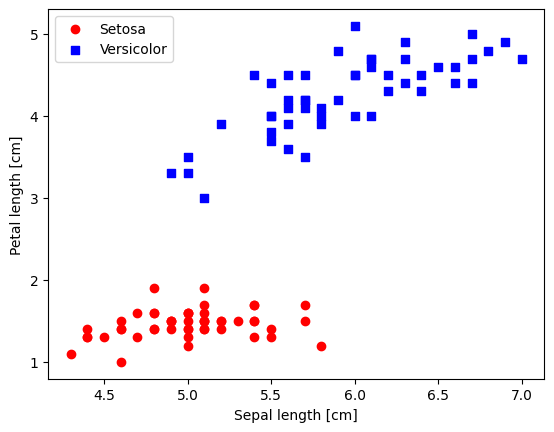

In [3]:
# pilih hanya data bunga Setosa dan Versicolor sebagai target
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# ambil dua fitur yaitu panjang sepal dan panjang petal
X = df.iloc[0:100, [0, 2]].values

# buat scatter plot untuk visualisasi data kedua kelas
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

# beri label pada sumbu x dan y agar mudah dibaca
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')

# tampilkan legenda untuk membedakan kelas bunga
plt.legend(loc='upper left')

# tampilkan grafik scatter plot di layar
plt.show()

<h2>4) Model 1 — Perceptron</h2>

<h2>4.1 Definisi Kelas</h2>
<ul><strong>
  <li>Kelas Perceptron dibuat untuk klasifikasi biner sederhana.</li>
<strong></ul>

In [4]:
class Perceptron:
    """Klasifikasi Perceptron sederhana."""

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        # eta     : learning rate (mengontrol seberapa besar perubahan bobot pada tiap update)
        # n_iter  : jumlah epoch (berapa kali seluruh dataset dipelajari)
        # random_state : seed agar bobot awal dapat direproduksi
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        Melatih model dengan data fitur X dan target y.
        X : array 2D [n_samples, n_features]
        y : array 1D [n_samples] (label kelas, biasanya 0 atau 1)
        """
        # generator random untuk inisialisasi bobot awal
        rgen = np.random.RandomState(self.random_state)

        # inisialisasi bobot kecil acak untuk tiap fitur
        # ukuran bobot = jumlah fitur (X.shape[1])
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])

        # inisialisasi bias dengan nol
        self.b_ = np.float_(0.)

        # list untuk menyimpan jumlah kesalahan di setiap epoch
        self.errors_ = []

        # lakukan proses pembelajaran sebanyak n_iter epoch
        for _ in range(self.n_iter):
            errors = 0  # penghitung kesalahan pada epoch ini

            # loop melalui semua sampel (xi = vektor fitur, target = label)
            for xi, target in zip(X, y):
                # hitung update bobot dengan aturan perceptron
                update = self.eta * (target - self.predict(xi))

                # update bobot sesuai nilai update
                self.w_ += update * xi

                # update bias
                self.b_ += update

                # jika ada update berarti prediksi salah → hitung error
                errors += int(update != 0.0)

            # simpan total kesalahan pada epoch ini
            self.errors_.append(errors)

        # kembalikan objek model terlatih
        return self

    def net_input(self, X):
        """
        Hitung input bersih (net input).
        Rumus: z = (X • w) + b
        X : data fitur (1 sampel atau banyak sampel)
        """
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """
        Menghasilkan prediksi kelas.
        Jika net input >= 0 → prediksi 1
        Jika net input < 0  → prediksi 0
        """
        return np.where(self.net_input(X) >= 0.0, 1, 0)



Kode di atas merupakan implementasi sederhana dari **algoritma Perceptron**, salah satu model paling dasar dalam jaringan syaraf tiruan untuk klasifikasi biner. Pada tahap inisialisasi (`__init__`), model menerima tiga parameter: `eta` sebagai **learning rate** yang mengatur besar langkah pembaruan bobot, `n_iter` sebagai jumlah **epoch** atau banyaknya siklus pelatihan terhadap seluruh dataset, dan `random_state` untuk memastikan bobot awal yang diacak dapat direproduksi. Proses pelatihan dilakukan dalam metode `fit(X, y)`, di mana bobot awal (`self.w_`) diinisialisasi dengan nilai acak kecil dan bias (`self.b_`) dimulai dari nol. Selama pelatihan, setiap sampel diproses secara berurutan: model melakukan prediksi menggunakan fungsi `predict`, kemudian bobot diperbarui jika prediksi tidak sesuai dengan label target. Rumus pembaruan bobot mengikuti aturan perceptron, yaitu menambahkan produk antara **learning rate**, selisih label target dengan prediksi, dan vektor fitur input. Jika prediksi salah, jumlah error pada epoch tersebut bertambah, lalu disimpan ke dalam list `errors_` sebagai catatan performa per epoch.

Untuk menghasilkan prediksi, fungsi `net_input` menghitung **net input** berupa hasil perkalian dot product antara vektor fitur dan bobot ditambah dengan bias. Hasil ini kemudian diproses oleh fungsi `predict` yang menggunakan fungsi aktivasi step sederhana: jika nilai net input lebih besar atau sama dengan nol maka diklasifikasikan sebagai kelas 1, jika lebih kecil maka kelas 0. Dengan demikian, alur kerja perceptron dapat diringkas sebagai berikut: data fitur masuk → dihitung net input → dilakukan prediksi → jika salah, bobot diperbarui → diulang hingga semua epoch selesai. Meskipun sederhana, kode ini mencerminkan prinsip inti pembelajaran mesin berbasis gradien dan menjadi fondasi bagi pengembangan algoritma jaringan syaraf yang lebih kompleks.



<h2>4.2 Latih & Plot Error</h2>
<ul><strong>
  <li>Melatih Perceptron lalu melihat grafik jumlah kesalahan per epoch.</li>
<strong></ul>

In [5]:
v1 = np.array([1, 2, 3])  # buat vektor pertama
v2 = 0.5 * v1             # buat vektor kedua sebagai skala dari v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))  # hitung sudut antara v1 dan v2 dalam radian

0.0

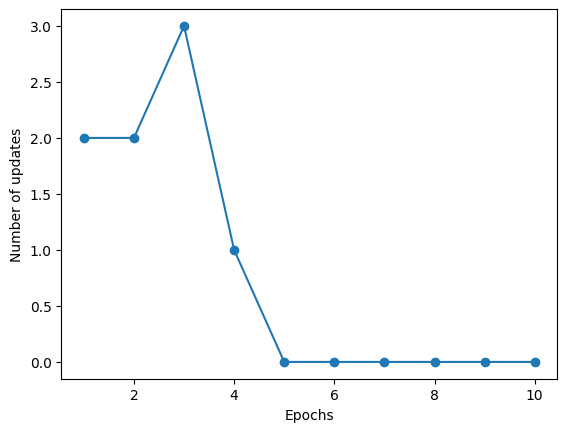

In [6]:
ppn = Perceptron(eta=0.01, n_iter=10, random_state=1)     # Silakan diisi bagian ini dengan kode yang tepat (15)
ppn.fit(X, y)                         # latih model perceptron dengan data X dan y

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')  # plot jumlah kesalahan per epoch
plt.xlabel('Epochs')                  # beri label sumbu x sebagai jumlah epoch
plt.ylabel('Number of updates')       # beri label sumbu y sebagai jumlah update/kesalahan


plt.show()                            # tampilkan grafik di layar


<h2>4.3 Fungsi Decision Boundary</h2>
<ul><strong>
  <li>Fungsi pembantu untuk menggambar garis pemisah antar kelas.</li>
<strong></ul>

In [7]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # siapkan bentuk marker dan warna untuk tiap kelas
    markers = ('o', 's', '^', 'v', '<')  
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')  
    cmap = ListedColormap(colors[:len(np.unique(y))])  # pilih warna sesuai jumlah kelas unik

    # hitung batas area untuk plot permukaan keputusan
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),  # buat grid pada fitur 1
                           np.arange(x2_min, x2_max, resolution))  # buat grid pada fitur 2
    
    # prediksi kelas untuk setiap titik di grid
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  
    lab = lab.reshape(xx1.shape)  # bentuk ulang hasil prediksi sesuai ukuran grid
    
    # gambar area keputusan berdasarkan hasil prediksi
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)  
    plt.xlim(xx1.min(), xx1.max())  
    plt.ylim(xx2.min(), xx2.max())  

    # plot titik data asli untuk tiap kelas
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],   # fitur ke-1
                    y=X[y == cl, 1],   # fitur ke-2
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')


Kode di atas berfungsi untuk membuat visualisasi **decision region** atau **daerah keputusan** dari sebuah model klasifikasi dua dimensi, sehingga kita dapat melihat bagaimana model memisahkan kelas pada ruang fitur. Fungsi `plot_decision_regions` menerima input berupa data fitur `X`, label `y`, model `classifier` yang sudah dilatih, serta parameter `resolution` yang menentukan seberapa rapat grid untuk pemetaan wilayah keputusan.

Pertama, fungsi menyiapkan **marker** dan **warna** untuk tiap kelas. Marker digunakan untuk membedakan simbol titik data, sedangkan warna digunakan untuk membedakan area keputusan antar kelas. Fungsi `ListedColormap` dipakai untuk memilih kombinasi warna sesuai dengan jumlah kelas unik yang ada pada label `y`.

Selanjutnya, fungsi menghitung batas minimum dan maksimum dari fitur pertama (`x1`) dan fitur kedua (`x2`) untuk menentukan area plot. Kemudian, `np.meshgrid` digunakan untuk membentuk grid dua dimensi dengan jarak antar titik sesuai resolusi. Setiap titik pada grid ini kemudian diprediksi kelasnya oleh model melalui `classifier.predict`, lalu hasil prediksi dibentuk kembali (`reshape`) agar sesuai dengan ukuran grid.

Hasil prediksi grid tersebut divisualisasikan dengan `plt.contourf`, yaitu mengisi area plot dengan warna sesuai label kelas yang diprediksi, sehingga terbentuk **pola batas keputusan**. Fungsi `plt.xlim` dan `plt.ylim` digunakan untuk mengatur rentang sumbu agar mencakup seluruh area data.

Terakhir, data asli `X` dengan label `y` ditambahkan di atas permukaan keputusan menggunakan `plt.scatter`. Tiap kelas digambar dengan warna dan marker yang berbeda agar terlihat jelas perbedaan distribusi datanya. Dengan demikian, fungsi ini memungkinkan kita untuk melihat secara langsung bagaimana model klasifikasi (misalnya Perceptron atau Logistic Regression) membuat pemisahan antar kelas, apakah garis batasnya linear, non-linear, atau justru kurang mampu memisahkan data dengan baik.



<h2>4.4 Visualisasi Boundary</h2>
<ul><strong>
  <li>Menampilkan garis pemisah model Perceptron di data asli.</li>
<strong></ul>

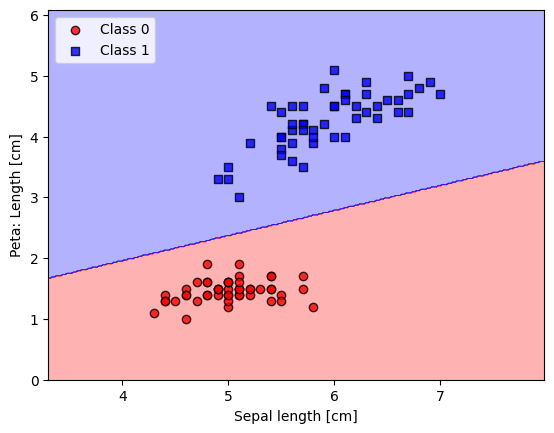

In [16]:
plot_decision_regions(X=X, y=y, classifier=ppn)  # Silakan diisi bagian ini dengan kode yang tepat (8) 
plt.xlabel('Sepal length [cm]')              # beri label sumbu x sebagai panjang sepal
plt.ylabel('Peta: Length [cm]')                        # Silakan diisi bagian ini dengan kode yang tepat (8) 
plt.legend(loc='upper left')                 # tampilkan legenda di pojok kiri atas

#plt.savefig('images/02_08.png', dpi=300)   # simpan grafik ke file (opsional)
plt.show()                                   # tampilkan grafik di layar


<h2>Model 2 — Adaline (Batch Gradient Descent)</h2>

<h2>5.1 Definisi Kelas</h2>
<ul><strong>
  <li>Kelas AdalineGD menggunakan gradient descent untuk menurunkan error.</li>
<strong></ul>

In [19]:
class AdalineGD:
    """Klasifikasi ADAptive LInear NEuron (Adaline) dengan Gradient Descent."""

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta            # learning rate (kecepatan update bobot)
        self.n_iter = n_iter      # jumlah epoch (ulangan pelatihan)
        self.random_state = random_state  # seed acak untuk konsistensi hasil

    def fit(self, X, y):
        # latih model dengan data X dan label y
        rgen = np.random.RandomState(self.random_state)  
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])  # inisialisasi bobot acak kecil
        self.b_ = np.float_(0.)                                      # inisialisasi bias 0
        self.losses_ = []                                            # list untuk simpan loss setiap epoch

        for i in range(self.n_iter):                                 # ulangi sebanyak n_iter
            net_input = self.net_input(X)                            # hitung input bersih
            output = self.activation(net_input)                      # aktivasi identitas (sama dengan input)
            errors = (y - output)                                    # selisih target dan output
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0] # update bobot dengan gradien
            self.b_ += self.eta * 2.0 * errors.mean()                # update bias dengan rata-rata error
            loss = (errors**2).mean()                                # hitung MSE loss
            self.losses_.append(loss)                                # simpan loss tiap epoch
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_   # hitung input bersih (dot product + bias)

    def activation(self, X):
        return X   # fungsi aktivasi identitas (output = input)

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)  # prediksi label kelas (0/1) dengan threshold 0.5


Kode di atas merupakan implementasi algoritma **Adaline (ADAptive LInear NEuron)** menggunakan **Gradient Descent** untuk klasifikasi biner. Adaline mirip dengan Perceptron, namun berbeda pada mekanisme pembelajaran: Perceptron memperbarui bobot berdasarkan kesalahan klasifikasi (benar atau salah), sedangkan Adaline menggunakan **error kontinu** dari perbedaan nilai output dengan target dan meminimalkan **Mean Squared Error (MSE)**.

Pada tahap inisialisasi (`__init__`), ditentukan parameter `eta` sebagai **learning rate** yang mengontrol besar langkah update bobot, `n_iter` sebagai jumlah epoch, dan `random_state` untuk menghasilkan bobot acak yang konsisten antar percobaan. Dalam metode `fit`, bobot awal `self.w_` diinisialisasi dengan nilai acak kecil dari distribusi normal, sedangkan bias `self.b_` dimulai dari nol. Sebuah list `self.losses_` disiapkan untuk menyimpan nilai loss pada setiap epoch.

Selama proses pelatihan, model pertama-tama menghitung **net input** (`net_input = self.net_input(X)`) yang merupakan kombinasi linear antara fitur dan bobot ditambah bias. Output dihitung melalui fungsi aktivasi (`self.activation`), yang pada Adaline adalah fungsi identitas, sehingga output sama dengan net input. Error dihitung sebagai selisih antara target `y` dan output. Bobot diperbarui menggunakan aturan gradient descent: `self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]`, yang berarti bobot diperbaiki searah dengan gradien negatif dari fungsi loss. Bias juga diperbarui berdasarkan rata-rata error. Setelah itu, nilai **MSE loss** dihitung dari kuadrat error dan disimpan ke dalam `self.losses_`. Proses ini diulang hingga semua epoch selesai.

Metode `net_input` menghitung masukan linear (dot product + bias), sementara metode `activation` mengembalikan input apa adanya (fungsi identitas). Untuk prediksi, metode `predict` menggunakan nilai threshold 0.5: jika output ≥ 0.5 maka diprediksi sebagai kelas 1, jika kurang dari itu diprediksi kelas 0. Dengan demikian, Adaline tidak hanya melakukan klasifikasi, tetapi juga berusaha **meminimalkan error kontinu** yang membuat pembaruan bobot lebih stabil dibanding Perceptron.



<h2>5.2 Efek Learning Rate</h2>
<ul><strong>
  <li>Melihat bagaimana pengaruh nilai learning rate terhadap hasil pelatihan.</li>
<strong></ul>

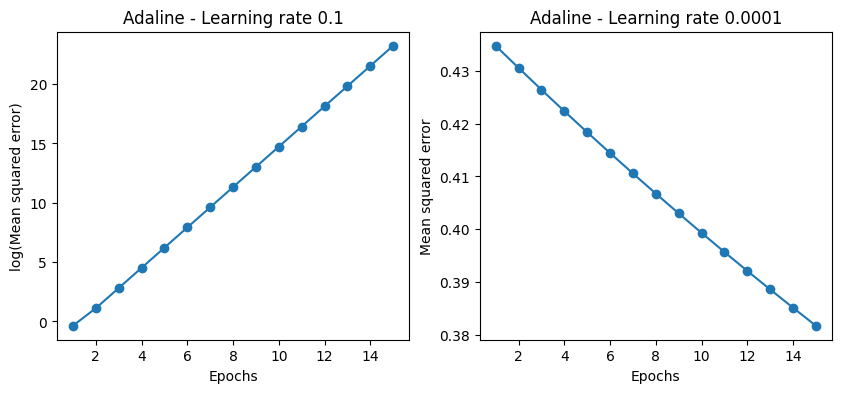

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))  # buat dua subplot berdampingan dengan ukuran 10x4

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X=X, y=y)      # Silakan diisi bagian ini dengan kode yang tepat (15) 


ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')  # plot log10 dari loss per epoch
ax[0].set_xlabel('Epochs')  # beri label sumbu x
ax[0].set_ylabel('log(Mean squared error)')  # beri label sumbu y
ax[0].set_title('Adaline - Learning rate 0.1')  # beri judul subplot pertama

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)  # latih Adaline dengan learning rate 0.0001 selama 15 epoch
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')  # plot loss asli per epoch
ax[1].set_xlabel('Epochs')  # beri label sumbu x
ax[1].set_ylabel('Mean squared error')  # beri label sumbu y
ax[1].set_title('Adaline - Learning rate 0.0001')  # beri judul subplot kedua

plt.show()  # tampilkan grafik di layar


<h2>5.3 Standardisasi + Boundary + Grafik Loss</h2>
<ul><strong>
  <li>Melatih model setelah data distandarisasi, lalu melihat decision boundary dan kurva loss.</li>
<strong></ul>

In [23]:
# salin array X agar tidak mengubah data asli
X_std = np.copy(X)  

# standarisasi fitur pertama (kolom 0) dengan rumus (x - mean) / std
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()  

# standarisasi fitur kedua (kolom 1) dengan rumus (x - mean) / std
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()  


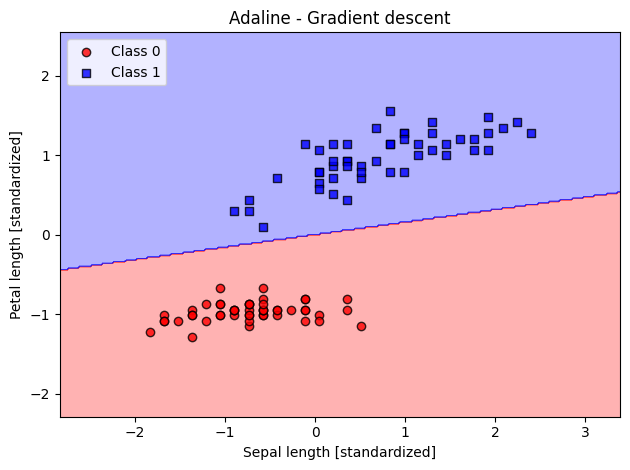

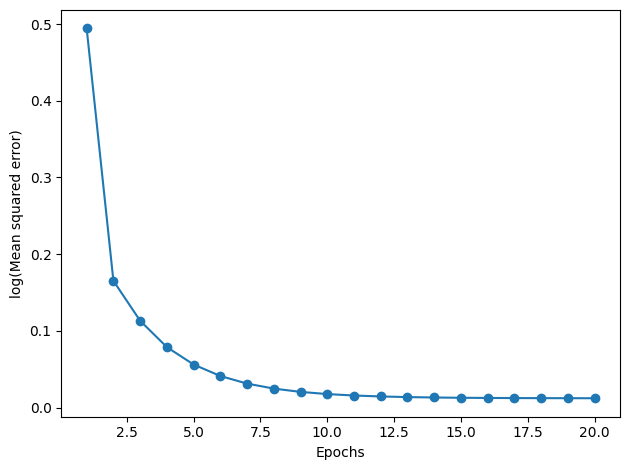

In [28]:
ada_gd = AdalineGD(n_iter=20, eta=0.5) # buat model Adaline dengan 20 epoch dan learning rate 0.5
ada_gd.fit(X_std, y) # latih model menggunakan data yang sudah distandarisasi

plot_decision_regions(X=X_std, y=y, classifier=ada_gd) # Silakan diisi bagian ini dengan kode yang tepat (8) 
plt.title('Adaline - Gradient descent')             # judul grafik decision boundary
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')  # plot grafik error (loss) per epoch
plt.xlabel('Epochs')
plt.ylabel('log(Mean squared error)')       # Silakan diisi bagian ini dengan kode yang tepat (8)

plt.tight_layout()

plt.show()

<h2>6) Model 3 — Adaline (Stochastic Gradient Descent)</h2>

<h2>6.1 Definisi Kelas</h2>
<ul><strong>
  <li>Kelas AdalineSGD memperbarui bobot tiap sampel (cocok untuk data besar).</li>
<strong></ul>

In [29]:
class AdalineSGD:
    """Klasifikasi ADAptive LInear NEuron dengan Stochastic Gradient Descent."""

    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta                    # learning rate
        self.n_iter = n_iter              # jumlah epoch
        self.w_initialized = False        # status inisialisasi bobot
        self.shuffle = shuffle            # apakah data diacak setiap epoch
        self.random_state = random_state  # seed random

    def fit(self, X, y):
        self._initialize_weights(X.shape[1])   # inisialisasi bobot kecil acak
        self.losses_ = []                      # simpan loss tiap epoch
        for i in range(self.n_iter):           # ulangi sesuai jumlah epoch
            if self.shuffle:                   # acak data tiap epoch jika True
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):       # iterasi tiap sampel
                losses.append(self._update_weights(xi, target))  # update bobot
            avg_loss = np.mean(losses)         # rata-rata loss epoch
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        if not self.w_initialized:             # inisialisasi bobot jika belum
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:             # jika banyak sampel
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:                                  # jika hanya satu sampel
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))      # acak urutan data
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)  
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)  # bobot acak kecil
        self.b_ = np.float_(0.)                                # bias awal 0
        self.w_initialized = True                              # tandai bobot sudah siap
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))           # hitung output
        error = (target - output)                              # selisih target dan output
        self.w_ += self.eta * 2.0 * xi * (error)               # update bobot
        self.b_ += self.eta * 2.0 * error                      # update bias
        loss = error**2                                        # loss (MSE per sampel)
        return loss
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_   # hitung input bersih

    def activation(self, X):
        return X   # fungsi aktivasi identitas (output = input)

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)  # prediksi label 0/1


Kode tersebut mengimplementasikan **Adaline (ADAptive LInear NEuron) dengan Stochastic Gradient Descent (SGD)** untuk klasifikasi biner. Berbeda dari versi *batch* (AdalineGD) yang menghitung gradien menggunakan seluruh data sekaligus pada tiap epoch, AdalineSGD memperbarui bobot **per sampel** secara berurutan. Parameter utama yang disediakan adalah `eta` (learning rate), `n_iter` (jumlah epoch), `shuffle` (opsi untuk mengacak urutan data tiap epoch agar mengurangi pola yang merugikan selama pembelajaran), serta `random_state` untuk reproduktibilitas. Status `w_initialized` dipakai agar model tidak menginisialisasi bobot berulang kali—ini penting untuk skenario *online learning* ketika kita memanggil `partial_fit` berkali-kali pada aliran data masuk.

Proses pelatihan dimulai pada `fit(X, y)` dengan memanggil `_initialize_weights(m)` untuk membuat bobot kecil acak (`self.w_`) dan bias nol (`self.b_`). Jika `shuffle=True`, data diacak menggunakan `_shuffle` (berbasis permutasi indeks dari `RandomState`) sehingga urutan sampel berbeda di setiap epoch—praktik ini sering membantu konvergensi saat memakai SGD. Pada setiap epoch, model melakukan loop atas pasangan `(xi, target)` dan memanggil `_update_weights`, yang: (1) menghitung **net input** = `xi • w + b`, (2) menerapkan **aktivasi identitas** (Adaline memakai fungsi linear, jadi output = net input), (3) menghitung *error* = `target - output`, lalu (4) memperbarui bobot dan bias dengan aturan **gradient descent** per sampel: `w ← w + eta * 2 * xi * error` dan `b ← b + eta * 2 * error`. Nilai **loss** per sampel adalah `error**2` (MSE satu titik), dan rata-ratanya disimpan sebagai `avg_loss` pada `losses_` per epoch untuk memantau penurunan error.

Metode `partial_fit` memungkinkan **pembelajaran inkremental** tanpa mengulang inisialisasi bobot—berguna ketika data datang bertahap atau ukuran dataset terlalu besar untuk *batch training*. Jika yang diberikan banyak sampel, `partial_fit` memperbarui bobot satu per satu; jika hanya satu sampel, ia langsung melakukan satu pembaruan. Untuk menghasilkan prediksi kelas, `predict(X)` menerapkan ambang sederhana **0.5** pada output linear: nilai ≥ 0.5 dipetakan ke kelas 1 dan selebihnya ke 0. (Catatan: karena output Adaline bersifat kontinu dan tidak dibatasi, praktik umum adalah melakukan **standardisasi fitur** terlebih dahulu agar skala fitur tidak menyebabkan langkah pembaruan terlalu besar atau terlalu kecil.)

Secara ringkas, AdalineSGD menggabungkan kesederhanaan Adaline dengan efisiensi dan dinamika konvergensi milik **SGD**: pembaruan cepat per sampel, dukungan *online learning* via `partial_fit`, dan *shuffling* untuk stabilitas. Dibanding AdalineGD (batch), pendekatan ini lebih hemat memori dan sering kali lebih cepat menemukan arah gradien yang baik pada dataset besar, meskipun kurva loss bisa lebih “berisik” antar-iterasi karena estimasi gradien berbasis satu sampel. Untuk hasil yang lebih stabil, praktik yang sering dipakai adalah **skala fitur** (standarisasi), menyesuaikan `eta`, dan—bila dibutuhkan—menambahkan strategi seperti **decay learning rate** atau **early stopping**.


<h2>6.2 Latih & Plot Hasil</h2>
<ul><strong>
  <li>Latih model, tampilkan decision boundary, lalu plot grafik loss rata-rata.</li>
<strong></ul>

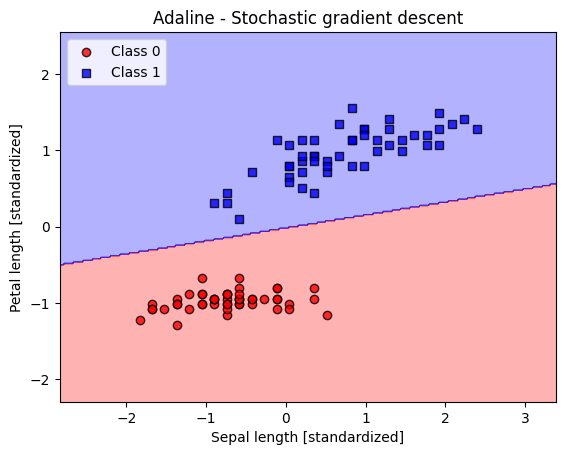

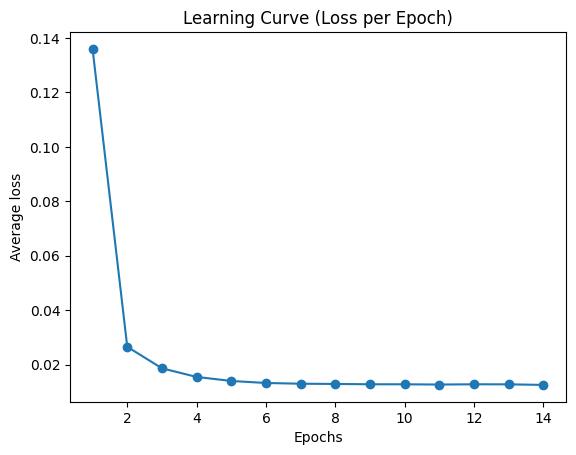

In [31]:
ada_sgd = AdalineSGD(eta=0.01, n_iter=14, shuffle=True, random_state=None)           # Silakan diisi bagian ini dengan kode yang tepat (15) 
ada_sgd.fit(X_std, y)                                      # latih model dengan data standar

# --- Plot 1: Decision boundary ---                              
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

# --- Plot 2: Grafik loss ---
plt.figure()
# Menampilkan perkembangan nilai average loss pada setiap epoch
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.title('Learning Curve (Loss per Epoch)')
plt.show()                              


<h2>6.3 Partial Fit</h2>
<ul><strong>
  <li>Contoh update model dengan data baru tanpa melatih ulang semuanya.</li>
<strong></ul>

In [32]:
ada_sgd.partial_fit(X=X, y=y)   # Silakan diisi bagian ini dengan kode yang tepat (7) 

<h2>7) Prediksi Data Baru (Perceptron vs AdalineGD vs AdalineSGD)</h2>
<ul><strong>
    <li>Kita coba uji sampel data baru dan bandingkan hasil prediksi dari ketiga model (Perceptron, AdalineGD, dan AdalineSGD).</li>
    <li>Data harus distandarisasi dulu sebelum dipakai di Adaline, supaya konsisten dengan data training.</li>
    <li>Bagian ini membantu kita melihat bagaimana setiap model memberi keputusan pada data baru yang belum pernah dilihat sebelumnya.</li>
<strong></ul>

In [35]:
# === 1) Data baru ===
X_new = np.array([[5.1, 1.4]])  # contoh sampel baru dengan sepal_length=5.5 cm dan petal_length=4.0 cm

# === 2) Prediksi dengan Perceptron (data mentah) ===
# Perceptron dilatih tanpa standardisasi, jadi bisa langsung dipakai.
y_pred_ppn = ppn.predict(X_new)

# === 3) Standarisasi data baru ===
# Adaline dilatih dengan data yang sudah distandarisasi supaya training lebih stabil
# (gradien lebih seimbang, konvergensi lebih cepat).
X_mean = X.mean(axis=0)                     # rata-rata dari data training
X_std_dev = X.std(axis=0)                   # standar deviasi dari data training
X_new_std = (X_new - X_mean) / X_std_dev    # standardisasi data baru

# === 4) Prediksi dengan AdalineGD & AdalineSGD ===
# Karena model Adaline dilatih dengan data terstandarisasi, input baru juga harus distandarisasi.
y_pred_ada_gd = ada_gd.predict(X_new_std)
y_pred_ada_sgd = ada_sgd.predict(X_new_std)

# === 5) Tampilkan hasil perbandingan ===
print("Hasil prediksi data baru (sepal_length=5.5, petal_length=4.0):")
print(f"Perceptron : {y_pred_ppn[0]}")
print(f"AdalineGD  : {y_pred_ada_gd[0]}")
print(f"AdalineSGD : {y_pred_ada_sgd[0]}")


Hasil prediksi data baru (sepal_length=5.5, petal_length=4.0):
Perceptron : 0
AdalineGD  : 0
AdalineSGD : 0


<h2>8) Simpan & Muat Model dengan Pickle</h2>
<ul><strong>
    <li>Setelah memilih satu model kita simpan model ke file .pkl menggunakan pickle agar tidak perlu melatih ulang setiap kali digunakan.</li>
    </li>
<strong></ul>

In [34]:
import pickle

# Simpan model Perceptron hasil training
with open("perceptron_model.pkl", "wb") as f:
    pickle.dump(ppn, f)

print("Model Perceptron berhasil disimpan ke perceptron_model.pkl")

Model Perceptron berhasil disimpan ke perceptron_model.pkl
